In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

First I'll generate the data. Here we'll have a few different frequencies of pure sine waves mixed in. The first graph below is each pure wave, and the second it the summed of them all. The goal will be to go from the end back to the first.

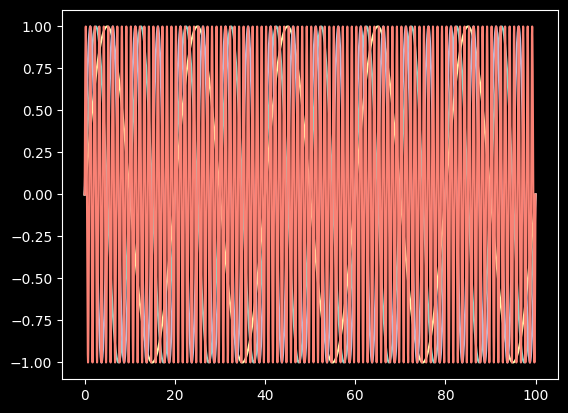

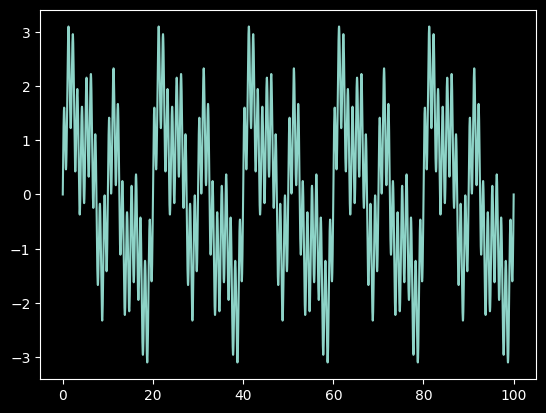

In [42]:
t_s = 100
sample_rate_per_s = 100
total_points = t_s*sample_rate_per_s
x = np.linspace(0, t_s, total_points)
gen_sin = lambda bps, x: np.sin(2*np.pi*bps*x)
pure_waves = [
	gen_sin(1/10, x), # 1 period every 10 seconds
	gen_sin(1/20, x), # 1 period over the 20 seconds
	gen_sin(1/5, x), # 1 period every 5 seconds
	gen_sin(1, x), # 1 hz
]
for p in pure_waves:
	plt.plot(x, p)
wave = np.vstack(pure_waves).sum(0)
plt.show()
plt.plot(x, wave)

Just to verify that my FFT algorithm is correct, I'll first compute the $N^2$ discrete fourier transform algorithm.

array([-7.90804922e-13+0.00000000e+00j,  7.28764271e-13+6.29832246e-13j,
        7.27196081e-14+4.78488641e-13j, ...,
        7.60564944e-11+3.70012243e-11j,  1.35628397e-10-5.31966074e-12j,
       -1.42335921e-10-2.30542188e-11j])

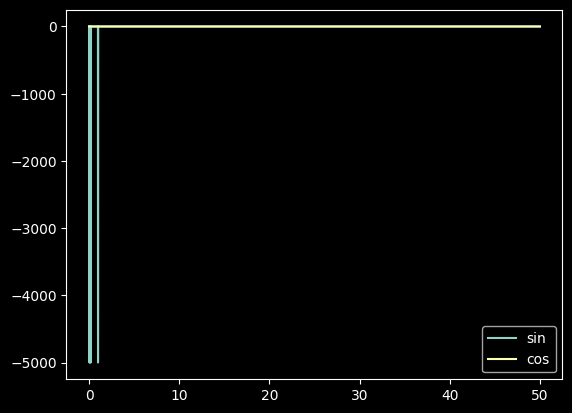

In [72]:
def plot_freq_space(f, frequency_space):
    plt.plot(f, np.imag(frequency_space), label="sin")
    plt.plot(f, np.real(frequency_space), label="cos")
    plt.legend()

def dft(x, y, t_s, sample_rate_per_s):
    # generate possible frequencies 
    # So the smallest frequency is 1/t_s which is 1/20 hz in this case. The largest frequency is  
    max_freq = sample_rate_per_s/2
    f = np.arange(0, max_freq+1/t_s, 1/t_s) # [0, max_freq]

    # weighted sum over frequencies to transform time space to frequency space
    frequency_space = np.zeros(len(f), dtype=np.complex128)
    for i in range(len(f)):
        pure_wave = np.exp(-1j*f[i]*2*np.pi*x)
        frequency_space[i] += pure_wave.dot(y)
    
    plot_freq_space(f, frequency_space)
    
    return frequency_space

dft(x, wave, t_s, sample_rate_per_s)

In [73]:
# Compute FFT and frequencies
fft_result = np.fft.fft(wave)
N = len(x)
freqs = np.fft.fftfreq(N, d=1/sample_rate_per_s)  # Use Fs to get Hz

# For real signals, only use the first half of the result
freqs = freqs[:N//2]
magnitude = np.abs(fft_result)[:N//2] * 2/N  # Scale to amplitude
fft_result = fft_result[:N//2]

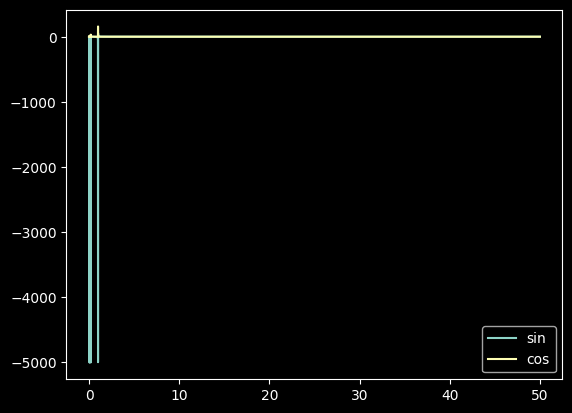

In [74]:
plot_freq_space(freqs, fft_result)

So I get the same results, but I still have to input my x points, total time, and sampling rate.

The numpy function just needs the data and we can resolve the frequencies later.

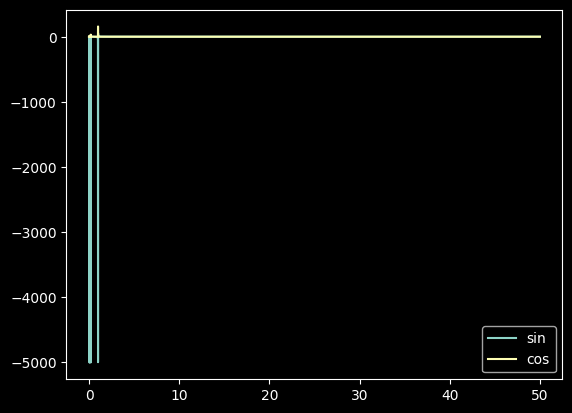

In [93]:
def dft_better(y):
    # generate possible frequencies 
    # So the smallest frequency is 1/t_s which is 1/20 hz in this case. The largest frequency is  
    N = len(y)
    x = np.arange(N)
    f = np.arange(N) 

    # weighted sum over frequencies to transform time space to frequency space
    frequency_space = np.zeros(len(f), dtype=np.complex128)
    for i in range(len(f)):
        pure_wave = np.exp(-1j*f[i]*2*np.pi*x/N)
        frequency_space[i] += pure_wave.dot(y)

    return frequency_space

def dftfreq(N, d):
    return np.arange(0, N*d, d) # [0, max_freq]
    

N = len(wave)
dft_result = dft_better(wave)
freqs = dftfreq(N, d=1/sample_rate_per_s)

freqs = freqs[:N//2]
dft_result = dft_result[:N//2]

plot_freq_space(freqs, dft_result)